In [1]:
import numpy as np
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from visualize import plot_decision_boundary
from tqdm import tqdm
from sklearn.datasets import make_moons

In [2]:
x,y=make_classification(n_samples=500,n_features=2,n_informative=2,n_redundant=0,n_classes=4,n_clusters_per_class=1,random_state=1)

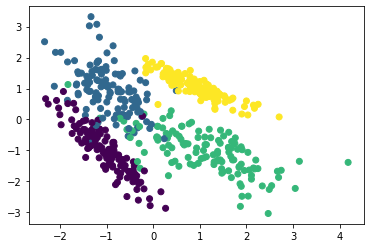

In [3]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [4]:
ohe=OneHotEncoder()
y=ohe.fit_transform(y.reshape(-1,1)).toarray()
y

c:\users\akshay\anaconda3\envs\tf\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]])

In [5]:
x.shape,y.shape

((500, 2), (500, 4))

In [6]:
class NeuralNetwork:
    """Creates a Neural Network and implements forward and backward propagation steps"""
    
    def __init__(self,layers=np.array([1]),n_features=2,learning_rate=0.1,itr=10):
        """layers: type(np.array). Each element corresponds to the no. of units in that layer.
                   No. of layers is given by the size of the list. 
                   (default=[1],means 1 layer with 1 unit(logistic regression))
           n_features=No. of features for each example (no. of inputs for the first hidden layer of the network)
           learning_rate=(0.1 default)
           itr: No. of iteration of Forward+Backward Propagation that are to be run (default=10)
        """
        
        self.layers=layers
        self.inputs=n_features
        self.itr=itr
        self.lr=learning_rate
        
        ################################### Initializing Weights & Biases for all Layers ###################################
        
        self.weights=[]                         
        self.biases=[]
        
        current_inputs=self.inputs
        
        for l in range(self.layers.shape[0]):
            wl=[]                                     #weights for layer l
            bl=[]                                     #biases for layer l
            for j in range(self.layers[l]):           #for each unit(j) in layer l
                
                wlj=(np.random.randn(current_inputs))*(2/current_inputs)**0.5   #weights for unit(j) in layer l
                blj=(np.random.randn())*(2/current_inputs)**0.5                 #bias for unit j in layer l (a scalar)
                
                wl.append(wlj)
                bl.append(blj)
                
            self.weights.append(np.array(wl))         #appending the weights of layer l to list of all weights
            self.biases.append(np.array(bl))          #appending the biases of layer l to list of all biases
            
            current_inputs=self.layers[l]             #No. of inputs to next layer is the no. of units in current layer
            
        self.weights=np.array(self.weights)           #converting self.weights and self.biases to numpy array
        self.biases=np.array(self.biases)
        
    def loss(self,y,output):
        if y is None:                                 #for test data
            return 0
        return 0.5*np.sum(np.sum((y-output)**2))
    
    def plot_loss(self,loss):
        plt.plot(np.arange(len(loss)),loss)
        plt.xlabel("itr")
        plt.ylabel("loss")
        plt.show()
    
    
    def activation(self,z):
        """Applies activation function to z"""
        return 1/(1+np.e**(-z))
    
    ############################################### Forward Propagation Step ##################################################
        
    def forward_propagation(self,x,y=None):
        """Implements 1 forward propagation Step"""
        a=x                                          #a is the input for current layer
        outputs=[]
        
        for l in range(self.layers.shape[0]):
            w=self.weights[l]
            b=self.biases[l]
            z=np.dot(a,w.T)+b
            a=self.activation(z)
            
            outputs.append(a)
            
        return outputs,self.loss(y,outputs[-1])
        
    ############################################### Backward Propagation Step ##################################################
    
    def backward_propagation(self,x,y,outputs):
        
        ################################################# for output layer ####################################################
        
        a=outputs[-1]                                      #outputs[-1] is the output of last (output) layer
        ap=outputs[-2]                                     #outputs[-1] is the output of the second last (last hidden) layer
        
        grad=[]                                            #grad will be an array of size (L,l) L=no. of units in output layer
                                                           #l=no. of units in last hidden layer
        delta=(a-y)*a*(1-a)                                #a will be of size (m,L) where m is the no. of training examples
                                                           #L is the no. of units in output layer. delta will be an array of
                                                           #size (m,L)
        
        for d in range(delta.shape[0]):                    #for each training example
            
            outd=[]                                        #will be of size (L,l)
            
            for i in delta[d]:                                    
            
                out=[]                                     #will be of size l where l=no. of units in last hidden layer
                for j in ap[d]:                            #ap is the output of the last hidden layer
                    out.append(i*j)  
                outd.append(out)
            grad.append(outd)
            
        grad=np.array(grad)                                #right now, grad is of size (m,L,l)
        grad=np.sum(grad,axis=0)                           #now grad is of size (L,l)
        
        bias_grad=np.sum(delta,axis=0)                     #an array of size L where L is the no. of units in output layer
    
        self.weights[-1]=self.weights[-1]-(self.lr*grad)        #updating the weights of the last layer
        self.biases[-1]=self.biases[-1]-(self.lr*bias_grad)     #updating the biases of the last layer  
        
        ################################################# for hidden layers ##################################################
        
        for h in range(-2,-self.layers.shape[0],-1):
            
            l=self.layers[h]                               #l=no. of units in current layer
        
            #ap is the output of previous layer
            if h==-self.layers.shape[0]:
                ap=x
            else: 
                ap=outputs[h-1]
                
            a=outputs[h]                                   #output of curent layer

            wn=self.weights[h+1]                           #weights of the next layer (size=(no. of units in next layer,l))
            
            delta=np.dot(delta,wn)*a*(1-a)                 #delta for current layer (size=(m,l))
                                                           #(delta to the right of = sign is the delta for the next layer)  
            grad=[]
            
            for d in range(delta.shape[0]):                                    
            
                outd=[]                                        

                for i in delta[d]:                                    

                    out=[]                                     
                    for j in ap[d]:                               
                        out.append(i*j)                        
                    outd.append(out)
                grad.append(outd)

            grad=np.array(grad)                                
            grad=np.sum(grad,axis=0)                           

            bias_grad=np.sum(delta,axis=0)                  
                
            self.weights[h]=self.weights[h]-(self.lr*grad)
            self.biases[h]=self.biases[h]-(self.lr*bias_grad)
            
    def fit(self,x,y):                                 #x,y is the training data
        loss=[]
        
        for i in tqdm(range(self.itr)):
            outputs,l=self.forward_propagation(x,y)
            loss.append(l)
            self.backward_propagation(x,y,outputs)
            
        self.plot_loss(loss)
    
    def predict(self,x):                               #x is the test set
        return np.argmax(self.forward_propagation(x)[0][-1],axis=1)

In [7]:
nn=NeuralNetwork(np.array([10,10,10,4]),itr=1000,learning_rate=0.01)
nn

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:16<00:00,  7.33it/s]


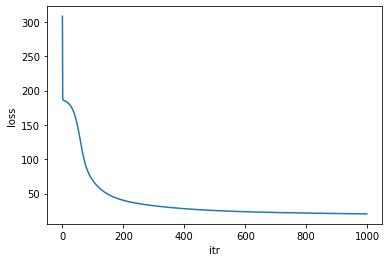

In [8]:
nn.fit(x,y)

In [9]:
predictions=nn.predict(x)

In [10]:
y=np.argmax(y,axis=1)
y

array([3, 0, 1, 1, 1, 0, 1, 3, 1, 0, 3, 2, 0, 3, 0, 0, 1, 1, 2, 0, 2, 0,
       2, 1, 2, 3, 1, 0, 3, 2, 1, 3, 1, 2, 1, 3, 1, 0, 1, 2, 0, 1, 2, 2,
       3, 1, 1, 0, 3, 1, 1, 0, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 0, 3, 1,
       3, 1, 1, 1, 3, 3, 2, 3, 2, 1, 2, 0, 3, 3, 2, 2, 2, 3, 0, 2, 2, 1,
       0, 1, 0, 1, 3, 1, 1, 2, 1, 1, 2, 2, 3, 1, 0, 1, 2, 2, 1, 2, 0, 0,
       3, 3, 0, 3, 2, 1, 3, 1, 3, 0, 3, 0, 1, 2, 0, 1, 1, 3, 3, 1, 0, 1,
       2, 2, 0, 2, 0, 3, 3, 3, 0, 2, 0, 0, 2, 3, 3, 0, 1, 0, 3, 3, 3, 0,
       1, 1, 2, 2, 2, 1, 0, 0, 2, 2, 0, 3, 0, 1, 1, 0, 0, 1, 1, 0, 3, 2,
       3, 0, 0, 2, 2, 1, 0, 1, 1, 1, 1, 3, 0, 0, 3, 1, 1, 2, 2, 0, 3, 0,
       0, 3, 0, 2, 3, 2, 3, 2, 3, 0, 3, 3, 0, 0, 1, 2, 3, 2, 0, 0, 1, 1,
       3, 2, 0, 3, 1, 3, 2, 1, 2, 3, 2, 2, 3, 2, 3, 0, 1, 0, 2, 1, 0, 2,
       3, 0, 1, 1, 3, 0, 0, 1, 3, 2, 2, 2, 1, 2, 2, 0, 0, 2, 1, 3, 2, 1,
       3, 0, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 0, 0, 1, 3, 3, 0, 3, 3, 1,
       0, 2, 0, 3, 3, 0, 0, 2, 1, 0, 3, 2, 0, 3, 3,

In [11]:
from collections import Counter
Counter(y-predictions)

Counter({0: 476, -1: 9, 1: 12, 2: 2, -2: 1})

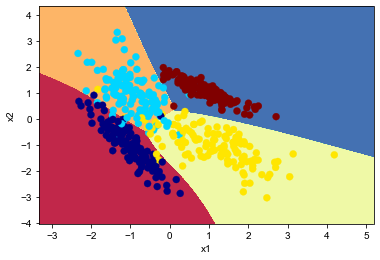

In [12]:
plot_decision_boundary(lambda x:nn.predict(x),x,y)